<h1 style="text-align:center; font-family:Arial; color:#34495e;">
📊 E-Commerce Marketplace Analysis 

</h1>
<p style="text-align:center; color:gray;">
End-to-End Data Analysis & Modeling
</p>

## Importing Libraries

In [555]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

## Reading Dataset

In [556]:
df = pd.read_csv('/Users/mm/Desktop/untitled folder 2/final/Sales.csv')

In [557]:
print('Showing the first 5 rows in data:--')
df.head()

Showing the first 5 rows in data:--


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,INDMKB,8/11/2020,11/11/2020,sas,as,asa,asa,asas,asas,...,42420.0,INDMKB,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,8/11/2020,11/11/2020,Second Class,CG-12520,asasa,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,12/6/2020,16/6/2020,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,11/10/2019,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,11/10/2019,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [558]:
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9983.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5010,1236,1334,5,794,798,4,2,532,...,NaN,5,1862,3,17,1849,NaN,NaN,NaN,NaN
top,NaN,CA-2021-100111,5/9/2020,16/12/2019,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5190,9993,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55245.233297,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32038.715955,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57103.000000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

In [560]:
print('The Shape of data :-\n',df.shape)

The Shape of data :-
 (9994, 21)


## Data Quality Validation

In [561]:
print('Checking for duplicate values in data:-\n',df.duplicated().sum())

Checking for duplicate values in data:-
 0


In [562]:
print('Checking for null values in data:-\n',df.isna().sum())

Checking for null values in data:-
 Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64


In [563]:
# droping null values
df.dropna(inplace=True) 

In [564]:
print('Checking for null values in data:-\n',df.isna().sum())

Checking for null values in data:-
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64


In [565]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df = df.rename(columns={'country/region':'country','sub-category':'subcategory','product_name':'product'})

In [566]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'subcategory',
       'product', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

 Invalid / Inconsistent Values

In [567]:
# Converting the type of Order&ship Date into date
df['order_date'] = pd.to_datetime(df['order_date'],format='mixed')
df['ship_date'] = pd.to_datetime(df['ship_date'],format='mixed')

## Creating derived features and flags

In [568]:
df['month'] = df['order_date'].dt.to_period('M')
last_date = df['order_date'].max()
current_month = df['month'].max()
prev_month = current_month-1

In [569]:
print(f'The last Date :{last_date}\n The last month :{current_month}\n The previous Month :{prev_month} ')

The last Date :2021-12-30 00:00:00
 The last month :2021-12
 The previous Month :2021-11 


o	Active vs Inactive Customers

In [570]:
last_purchase = df.groupby('customer_id')['order_date'].max().reset_index()
last_purchase.head()

,customer_id,order_date
0,AA-10315,2021-06-29
1,AA-10375,2021-11-12
2,AA-10480,2021-04-15
3,AA-10645,2021-05-11
4,AB-10015,2020-10-11


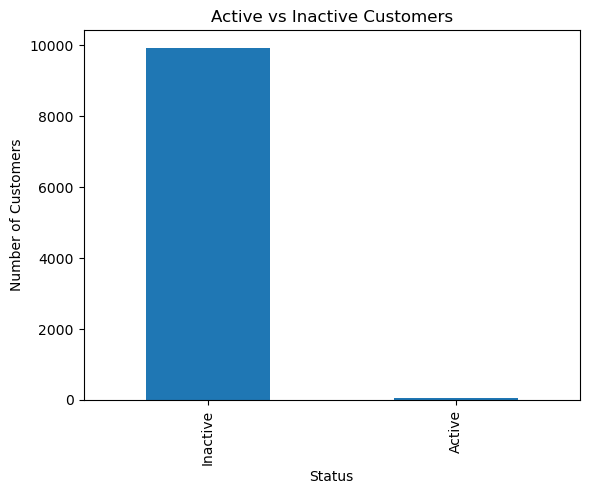

In [571]:
last_purchase['customer_status'] = last_purchase['order_date'].apply(
    lambda x:'Active' if x >= (last_date - pd.Timedelta(90)) else 'Inactive')

df = df.merge(last_purchase[['customer_id', 'customer_status']], on='customer_id', how='left')


df['customer_status'].value_counts().plot(kind='bar')
plt.title("Active vs Inactive Customers")
plt.xlabel("Status")
plt.ylabel("Number of Customers")
plt.show()

In [572]:
fig = px.pie(df.drop_duplicates('customer_id'),
             names='customer_status',
             title='Active vs Inactive Customers')
fig.show()

o	Repeat Customers

In [573]:
order_count = df.groupby('customer_id')['order_id'].nunique().reset_index()
order_count.head()

,customer_id,order_id
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3


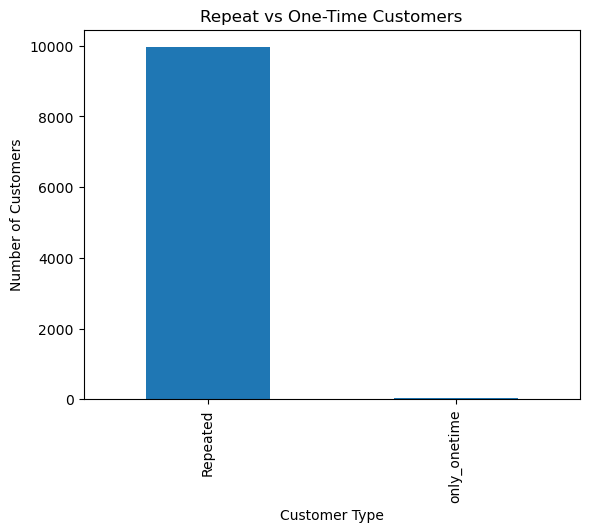

In [574]:
order_count['repeat_status'] = order_count['order_id'].apply(
    lambda x:'Repeated' if x > 1 else 'only_onetime'
)

df = df.merge(order_count[['customer_id', 'repeat_status']], 
              on='customer_id', how='left')


df['repeat_status'].value_counts().plot(kind='bar')
plt.title("Repeat vs One-Time Customers")
plt.xlabel("Customer Type")
plt.ylabel("Number of Customers")
plt.show()

o	New Customers

In [575]:
first_month = df.groupby('customer_id')['month'].min().reset_index()

first_month['new_customer'] = first_month['month'] == current_month

In [576]:
first_month['new_customer'].head()

0    False
1    False
2    False
3    False
4    False
Name: new_customer, dtype: bool

In [577]:
first_month['new_customer'] = first_month['new_customer'].map({True:'new_customer',False:'old_customer'})
first_month['new_customer'].head()

0    old_customer
1    old_customer
2    old_customer
3    old_customer
4    old_customer
Name: new_customer, dtype: object

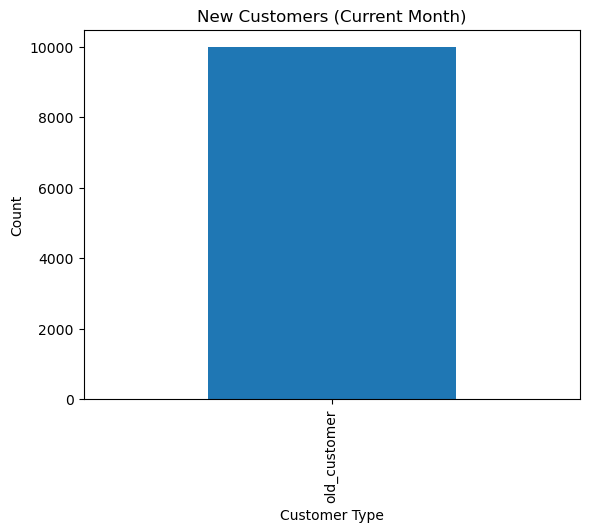

In [578]:
df = df.merge(
    first_month[['customer_id', 'new_customer']],
    on='customer_id',
    how='left'
)

df['new_customer'].value_counts().plot(kind='bar')
plt.title("New Customers (Current Month)")
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.show()

o	Churned Customers

In [579]:
prev_customers = df[df['month']==prev_month]['customer_id'].unique()
curr_customers = df[df['month']==current_month]['customer_id'].unique()

churned_customers = set(prev_customers)-set(curr_customers)

df['churn_status'] = df['customer_id'].apply(
    lambda x: 'churned' if x in churned_customers else 'stayed'
)

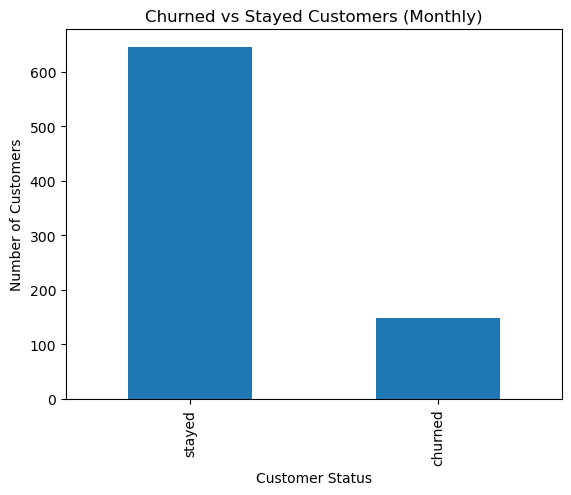

In [580]:
churn_counts = df[['customer_id','churn_status']].drop_duplicates()['churn_status'].value_counts()

churn_counts.plot(kind='bar')
plt.title("Churned vs Stayed Customers (Monthly)")
plt.xlabel("Customer Status")
plt.ylabel("Number of Customers")
plt.show()


# Business KPIs

•	Churn Rate

In [581]:
churn_rate = round((len(churned_customers)/len(prev_customers))*100,2)
churn_rate

82.32

•	Retention Rate

In [582]:
orders_per_customer = df.groupby('customer_id')['order_id'].nunique()

retention_rate = round(((orders_per_customer[orders_per_customer>1].count())/orders_per_customer.count())*100,2)
retention_rate

98.36

•	Average Order Value (AOV)

In [583]:
total_sales = df['sales'].sum()
num_orders = df['order_id'].nunique()

AOV = round(total_sales / num_orders,2)
AOV

457.29

•	Customer Lifetime Value (LTV)

In [584]:
revenue_per_customer = df.groupby('customer_id')['sales'].sum()

LTV = round(revenue_per_customer.mean(),2)
LTV

2881.95

•	Product & Category Performance

In [585]:
# Showing the top products
top_products = df.groupby('product')['sales'].sum().sort_values(ascending=False).reset_index().head(5)


In [586]:
fig = px.bar(top_products, x='product', y='sales',
             title='Top 5 Products',color='product')
fig.show()

o	Top categories 

In [587]:
# Showing the top categories
top_categories = df.groupby('category')['sales'].sum().sort_values(ascending=False).reset_index().head(5)

In [588]:
fig = px.pie(top_categories, names='category', values='sales',
             title='Sales by Category')
fig.show()

o	Top subcategories 

In [589]:
# Showing the top subcategories
top_subcategories = df.groupby('subcategory')['sales'].sum().sort_values(ascending=False).to_frame()
top_subcategories.head()

,sales
subcategory,
Phones,328712.304
Chairs,327733.903
Storage,222279.318
Tables,206965.532
Binders,203412.733


o	RFM analysis 

In [590]:
today_date = df['order_date'].max()

In [591]:
rfm = df.groupby('customer_id').agg({
    'order_date':lambda x:(today_date-x.max()).days,
    'order_id':'nunique',
    'sales':'sum'
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,customer_id,Recency,Frequency,Monetary
0,AA-10315,184,5,5563.560
1,AA-10375,48,9,1056.390
2,AA-10480,259,4,1790.512
3,AA-10645,233,6,5086.935
4,AB-10015,445,3,886.156


In [592]:
# creating scores 
rfm['Recency_score'] =pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])
rfm['Frequency_score'] = pd.qcut(rfm['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
rfm['Monetary_score'] = pd.qcut(rfm['Monetary'],5,labels=[1,2,3,4,5])

In [593]:
rfm['rfm_score'] = (rfm['Recency_score'].astype(str)+rfm['Frequency_score'].astype(str))

In [594]:
# Segmenting Customers Using RFM Score
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_risk',
    r'[1-2]5': 'cant_lose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['customer_segment'] = rfm['rfm_score'].replace(seg_map, regex=True)

rfm.head()

,customer_id,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,rfm_score,customer_segment
0,AA-10315,184,5,5563.560,2,2,5,22,hibernating
1,AA-10375,48,9,1056.390,4,5,2,45,loyal_customers
2,AA-10480,259,4,1790.512,2,1,3,21,hibernating
3,AA-10645,233,6,5086.935,2,3,5,23,at_risk
4,AB-10015,445,3,886.156,1,1,1,11,hibernating


In [595]:
df = df.merge(
    rfm[['customer_id', 'Recency', 'Frequency', 'Monetary',
         'Recency_score', 'Frequency_score', 'Monetary_score',
         'rfm_score', 'customer_segment']],
    on='customer_id',
    how='left'
)

df.head()


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,new_customer,churn_status,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,rfm_score,customer_segment
0,1,INDMKB,2020-08-11,2020-11-11,sas,as,asa,asa,asas,asas,...,old_customer,stayed,506,1,261.9600,1,1,1,11,hibernating
1,2,CA-2020-152156,2020-08-11,2020-11-11,Second Class,CG-12520,asasa,Consumer,United States,Henderson,...,old_customer,stayed,338,3,886.8200,1,1,1,11,hibernating
2,3,CA-2020-138688,2020-12-06,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,old_customer,churned,48,5,1119.4830,4,2,2,42,potential_loyalists
3,4,US-2019-108966,2019-11-10,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,old_customer,stayed,112,6,2602.5755,3,3,3,33,need_attention
4,5,US-2019-108966,2019-11-10,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,old_customer,stayed,112,6,2602.5755,3,3,3,33,need_attention


# Preprocessing

In [597]:
df = df.drop(columns=['row_id','order_id','customer_id','customer_name',
    'product_id','product','postal_code','order_date','customer_segment','Recency_score','Frequency_score','Monetary_score','rfm_score',
    'ship_date','customer_status','repeat_status','new_customer','month','Recency','Frequency','Monetary'])

In [598]:
df = df.drop(index=0)

In [599]:
df.head()

,ship_mode,segment,country,city,state,region,category,subcategory,sales,quantity,discount,profit,churn_status
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,stayed
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,churned
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,stayed
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,stayed
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,stayed


In [600]:
cols=['country', 'city', 'state', 'region',
       'category', 'subcategory','ship_mode', 'segment','churn_status']
encode = LabelEncoder()

for col in cols:
    df[col] = encode.fit_transform(df[col])
    

In [601]:
cols = ['sales','profit']

scaler = MinMaxScaler()

for col in cols:
    df[col] = scaler.fit_transform(df[[col]])

In [602]:
df['churn_status'].value_counts()

churn_status
1    7859
0    2123
Name: count, dtype: int64

# Splitting Dataset

In [603]:
X = df.drop(columns=['churn_status'])
y = df['churn_status']

In [604]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y,random_state=20)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (7985, 12)
Shape of X_test: (1997, 12)
Shape of y_train: (7985,)
Shape of y_test: (1997,)


In [605]:
smote = SMOTE(random_state=20)
x_train_res,y_train_res = smote.fit_resample(X_train,y_train)

In [606]:
y_train_res.value_counts()

churn_status
1    6287
0    6287
Name: count, dtype: int64

# Models

In [607]:
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

model.fit(x_train_res,y_train_res)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning:

[14:18:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1767713757252/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [608]:
y_pred = model.predict(X_test)

In [609]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred), "\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7086

Confusion Matrix:
[[ 117  308]
 [ 274 1298]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.28      0.29       425
           1       0.81      0.83      0.82      1572

    accuracy                           0.71      1997
   macro avg       0.55      0.55      0.55      1997
weighted avg       0.70      0.71      0.70      1997



In [610]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.5869
